In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(302, 14)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


## EDA

<AxesSubplot:xlabel='sex', ylabel='count'>

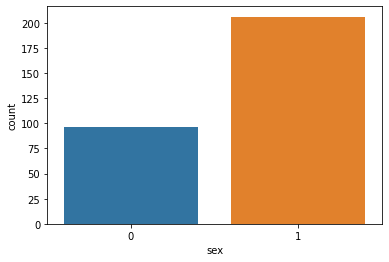

In [11]:
sns.countplot(data=df,x='sex')

<AxesSubplot:xlabel='cp', ylabel='count'>

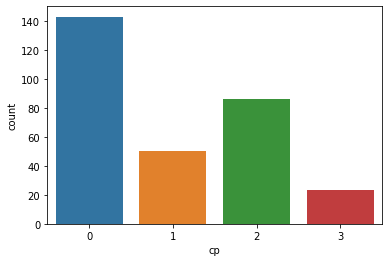

In [12]:
sns.countplot(data=df,x='cp')

C:\Users\Anonymous\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

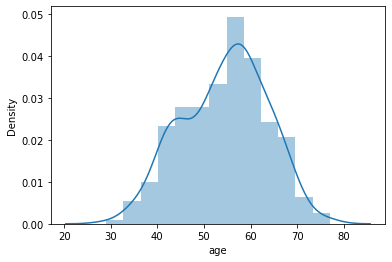

In [13]:
sns.distplot(df['age'])

In [14]:
# sns.pairplot(df,hue='output')

In [15]:
y = df['output']
X = df.drop(['output'],axis=1)

# Logistic Regression

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=40)

In [18]:
lr = LogisticRegression()

In [19]:
lr.fit(X_train,y_train)

C:\Users\Anonymous\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = lr.predict(X_test)

In [21]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [22]:
acc = accuracy_score(y_test,y_pred)

In [23]:
acc

0.9016393442622951

# KNeighbour Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
Knn = KNeighborsClassifier()
Knn.fit(X_train,y_train)
y_pred1 = Knn.predict(X_test)
acc1 = accuracy_score(y_test,y_pred1)

In [26]:
acc1

0.6721311475409836

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dst = DecisionTreeClassifier()
dst.fit(X_train,y_train)
y_pred2 = dst.predict(X_test)
acc2 = accuracy_score(y_test,y_pred2)

In [29]:
acc2

0.7213114754098361

# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred3 = rfc.predict(X_test)
acc3 = accuracy_score(y_test,y_pred3)

In [41]:
acc3

0.9016393442622951

# Gradient Boosting Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred4 = gb.predict(X_test)
acc4 = accuracy_score(y_test,y_pred4)

In [38]:
acc4

0.8360655737704918

In [42]:
x = [acc,acc1,acc2,acc3,acc4]

In [44]:
x = np.array(x)

In [45]:
x

array([0.90163934, 0.67213115, 0.72131148, 0.90163934, 0.83606557])

In [57]:
y = np.linspace(0,4,5)

In [58]:
y

array([0., 1., 2., 3., 4.])

C:\Users\Anonymous\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

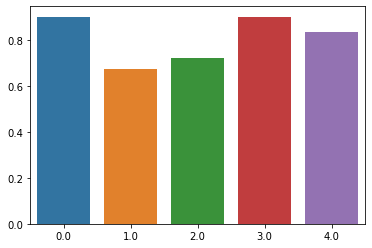

In [59]:
sns.barplot(y,x)